## Principal Component Analisis (PCA)

_Análisis de componente Principal_



Cuando utilizamos algoritmos de selección de caracteristicas (**Feature Selection**) mantenemos las caracteristicas originales y seleccionamos las que mejoran el rendimiento de los clasificadores.
Mientras que en el contexto de **reducción de dimensionalidad** se puede entender como la comprensión de los datos con el objetivo de mantener la mayor de la información.

**Principales razones para aplicar reducción de dimensionalidad:**

1. Almacenamiento
2. Eficiencia computaciónal
3. Mejorar el rendimiento predictivo, reduciendo la alta dimensionalidad

### PCA

**PCA** se enfoca en encontrar o identificar patrones en los datos, basandose en la correlación entre los atributos del dataset. 

De esta forma encuentra las direcciones de varianza máxima en datos de alta dimensionalidad y los proyecta en un nuevo subespacio con dimensiones iguales o menores que el original.

_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html_

### PCA para Matrices Sparse

_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Clasificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Validacion
from sklearn.model_selection import StratifiedKFold

In [2]:
X, y = datasets.load_wine(return_X_y = True, as_frame = True)

columnas = X.columns

In [3]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [5]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### Preprocesamiento

In [8]:
# Es otro escalador, que utiliza la media y la desviación estándar.
from sklearn.preprocessing import StandardScaler

In [9]:
# Normalización

x_scaler = StandardScaler()

X = x_scaler.fit_transform(X)

pd.DataFrame(X, columns = columnas)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


### Modelo antes de PCA

### Train, Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (124, 13), y_train: (124,)
X_test: (54, 13),  y_test: (54,)


In [13]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

yhat = model.predict(X_test)

accuracy_score(y_test, yhat)

1.0

### Modelo con PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [16]:
X.shape

(178, 2)

In [17]:
pd.DataFrame(X)

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


### Train, Test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (124, 2), y_train: (124,)
X_test: (54, 2),  y_test: (54,)


### Modelo

In [19]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

yhat = model.predict(X_test)

accuracy_score(y_test, yhat)

0.9814814814814815

### Varianza del Modelo de PCA

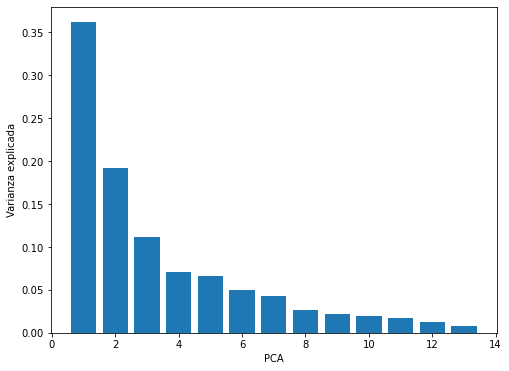

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


In [20]:
# Datos
X, y = datasets.load_wine(return_X_y = True, as_frame = True)

# Normalizacion
x_scaler = StandardScaler()
X = x_scaler.fit_transform(X)

# PCA
pca = PCA()
X = pca.fit_transform(X)


# Grafico de las variancias
plt.figure(figsize = (8, 6))

plt.bar(range(1, X.shape[1] + 1), pca.explained_variance_ratio_)

plt.ylabel("Varianza explicada")
plt.xlabel("PCA")
plt.show()


print(pca.explained_variance_)

In [21]:
def pca_n(n):
    
    print(f"n = {n}")
    
    # Datos
    X, y = datasets.load_wine(return_X_y = True, as_frame = True)

    # Normalizacion
    x_scaler = StandardScaler()
    X = x_scaler.fit_transform(X)

    # PCA
    pca = PCA(n_components = n)
    X = pca.fit_transform(X)


    # Grafico de las variancias
    plt.figure(figsize = (8, 6))

    plt.bar(range(1, X.shape[1] + 1), pca.explained_variance_ratio_)

    plt.ylabel("Varianza explicada")
    plt.xlabel("PCA")
    plt.show()
    
    # Train, Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    
    # Modelo
    model = RandomForestClassifier()
    model = model.fit(X_train, y_train)

    yhat = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, yhat)}")
    print("*"*100)

n = 1


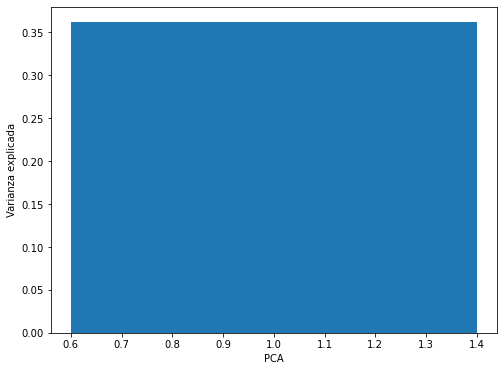

Accuracy: 0.8333333333333334
****************************************************************************************************
n = 2


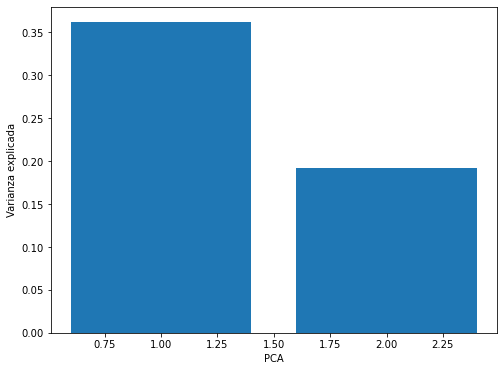

Accuracy: 0.9814814814814815
****************************************************************************************************
n = 3


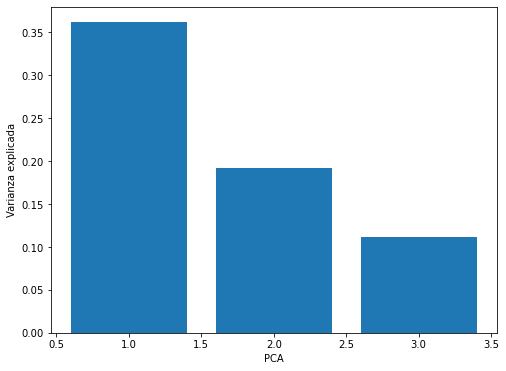

Accuracy: 0.9629629629629629
****************************************************************************************************
n = 4


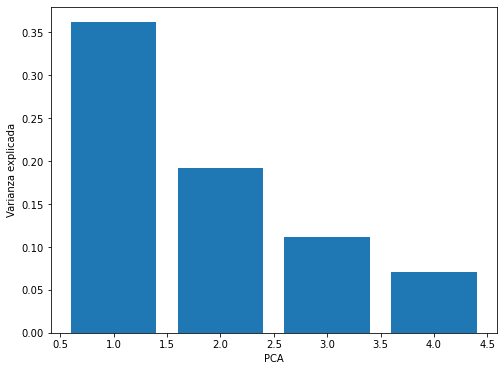

Accuracy: 0.9629629629629629
****************************************************************************************************
n = 5


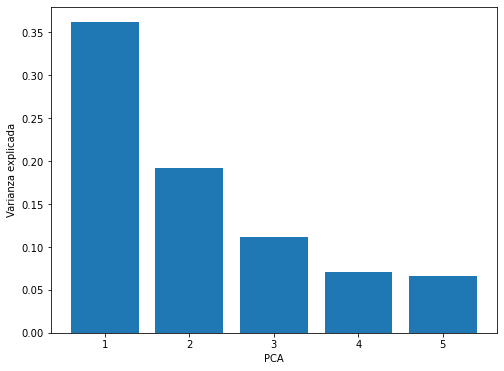

Accuracy: 0.9629629629629629
****************************************************************************************************


In [22]:
for n in range(1, 6):
    pca_n(n)

In [ ]:
################################################################################################################################